# Notebook for making testing graphs

All the information are taken from the text file generated which is located in the Unity Project folder

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
file = ("Temp.txt")#File Name

# Graph Testing Creation

In [4]:
def Graph(Time_Execution,tries,LLM,models,faulty):
    fig = plt.figure(figsize = (25,5))
    ax1 = fig.add_subplot(1,2,1)

    aux_model = str(models)
    plt.plot(Time_execution,color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12)
    plt.title("The number of models used is " +  aux_model,loc = "right")
    plt.title("LLM used: "+ LLM,loc = "left")
    plt.xticks([])
    plt.ylabel("Seconds")
    plt.xlabel("Runs \n The average amount of tries is " + str(tries),fontsize = 20)
    plt.legend(["Script"])
    plt.grid()
    plt.savefig("Graphs/" + LLM + "_" + "NModels_" + aux_model + ".jpg")
    print("The average number of faulty scripts is : ", faulty)
    
    plt.show()

## Extraction of  the seconds for the script generation

In [6]:
def seconds_filter(file):
    new = []
    for i in range(1, len(file)):
        if file[i-1] == "took":
            new.append(file[i].replace(",","."))
    return new

## Extraction of the tries  for the script generation

In [8]:
def tries_filter(file):
    new = []
    for i in range(1, len(file)):
        if file[i-1] == "required":
            new.append(file[i])
    return new

## Extraction of the number of models in the scene

In [10]:
def models_filter(file):
    new = []
    for i in range(1, len(file)):
        if file[i-1] == "~":
            new.append(file[i])
    return new

## Extraction of the number of faulty scripts in the scene

In [12]:
def faulty_filter(file):
    new = []
    for i in range(1, len(file)):
        if file[i-1] == "were":
            new.append(file[i])
    return new

## Extraction of the Large Language Model used for the script generation

In [14]:
def LLM_filter(file):
    new = []
    for i in range(1, len(file)):
        if file[i-1] == "-":
            new.append(file[i])
    return new

In [15]:
with open(file) as f:
    data = f.read()
splitfile = data.split()

In [16]:
A = tries_filter(splitfile)
aux = [int(x) for x in A]
triess = (sum(aux)/len(aux))

In [17]:
tries ="{:.3f}".format(triess) 

In [18]:
B = seconds_filter(splitfile)
Time_execution = [float(x) for x in B]

In [19]:
C = models_filter(splitfile)
aux = [int(x) for x in C]
models = int(sum(aux)/len(aux))

In [20]:
D = LLM_filter(splitfile)
LLM =  D[0]

In [21]:
E = faulty_filter(splitfile)
auxx = [int(x) for x in E]
faulty = (sum(auxx))/(len(auxx))

The average number of faulty scripts is :  0.08333333333333333


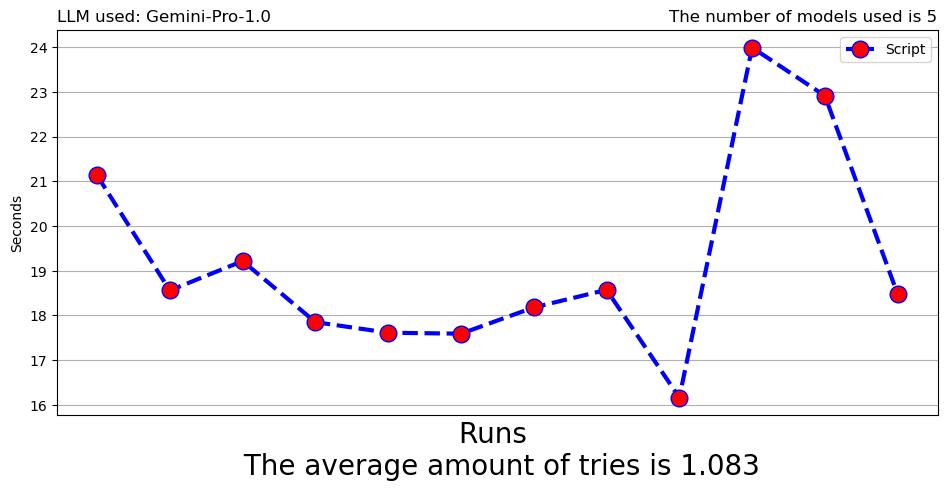

In [22]:
Graph(Time_execution,tries,LLM,models,faulty)